### Run this on colab GPU

In [1]:
!pip install keras --upgrade

    100% |████████████████████████████████| 317kB 7.1MB/s 
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


In [3]:
!pip install git+https://github.com/AI-Guru/ngdlm.git

  Cloning https://github.com/AI-Guru/ngdlm.git to /tmp/pip-req-build-0464vaax
  Running setup.py bdist_wheel for ngdlm ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-_c6l66h1/wheels/93/06/27/e156acb49f475c364c3c9fa4ad4ab7bfa38808bff5bf9c4647
Successfully built ngdlm


In [4]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [5]:
(x_input_train,_), (x_input_test,y_output_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# normalise the data
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0

In [10]:
latent_dim = 2

# encoder
encoder_input = layers.Input(shape=(28,28))
encoder_output = layers.Reshape((28*28,))(encoder_input) # this is just a simple reshaping operation, it's not yet latent space
encoder_output = layers.Dense(512,activation='relu')(encoder_output) # relu - rectified linear unit, this is the latent space
encoder = models.Model(encoder_input,encoder_output)

# decoder
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(512,activation='relu')(decoder_input)
decoder_output = layers.Dense(28*28,activation='sigmoid')(decoder_output)
decoder_output = layers.Reshape((28,28))(decoder_output)
decoder = models.Model(decoder_input,decoder_output)

# auto-encoder
vae = ngdlmodels.VAE(encoder,decoder,latent_dim=latent_dim) # this line of codes put the two models together

# compile
vae.compile(optimizer='adadelta',loss='binary_crossentropy')

vae.summary()


Encoder:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 784)          0           input_4[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 512)          401920      reshape_4[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_2[0][0]                    
__________________________________________________________________________________________________
z

In [12]:
history = vae.fit(
    x_input_train,x_input_train,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_data=(x_input_test,x_input_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 19s 320us/step - loss: 0.2730 - val_loss: 0.2477
Epoch 2/100
60000/60000 [==============================] - 17s 285us/step - loss: 0.2434 - val_loss: 0.2387
Epoch 3/100
60000/60000 [==============================] - 17s 285us/step - loss: 0.2357 - val_loss: 0.2320
Epoch 4/100
60000/60000 [==============================] - 17s 284us/step - loss: 0.2309 - val_loss: 0.2285
Epoch 5/100
60000/60000 [==============================] - 17s 284us/step - loss: 0.2282 - val_loss: 0.2260
Epoch 6/100
60000/60000 [==============================] - 17s 286us/step - loss: 0.2262 - val_loss: 0.2242
Epoch 7/100
60000/60000 [==============================] - 17s 284us/step - loss: 0.2245 - val_loss: 0.2228
Epoch 8/100
60000/60000 [==============================] - 17s 283us/step - loss: 0.2230 - val_loss: 0.2214
Epoch 9/100
60000/60000 [==============================] - 17s 283us/step - loss: 0.22

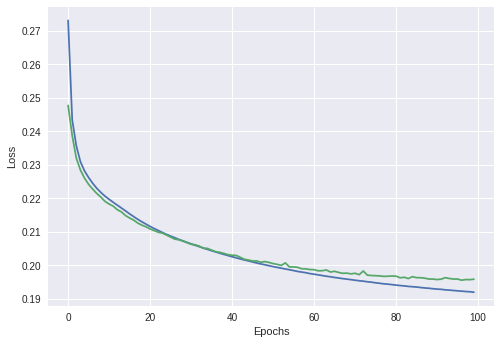

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.close()

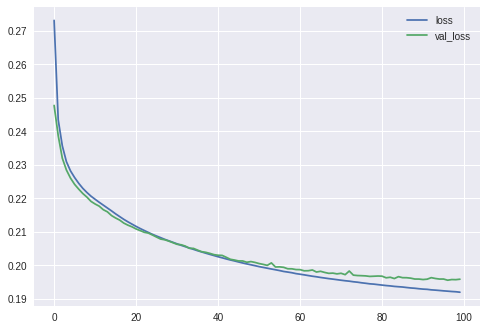

In [19]:
ngdlutils.render_history(history)

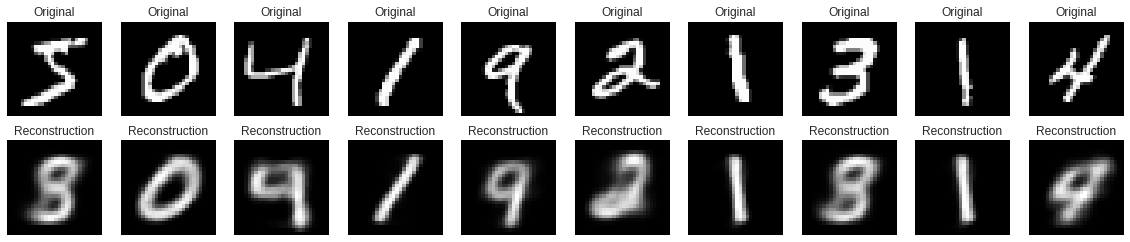

In [20]:
ngdlutils.render_image_reconstructions(vae,x_input_train[0:10])

(28, 28)


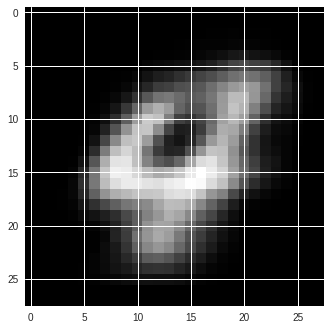

In [35]:
# now that we've trained our model, we can give our decoder some other random latent space verctor and it will predict what it thinks it is
x = np.array([[0.1,0.6]])
prediction = vae.decoder.predict(x)[0]
print(prediction.shape)

plt.imshow(prediction,cmap='gray')
plt.show()
plt.close()

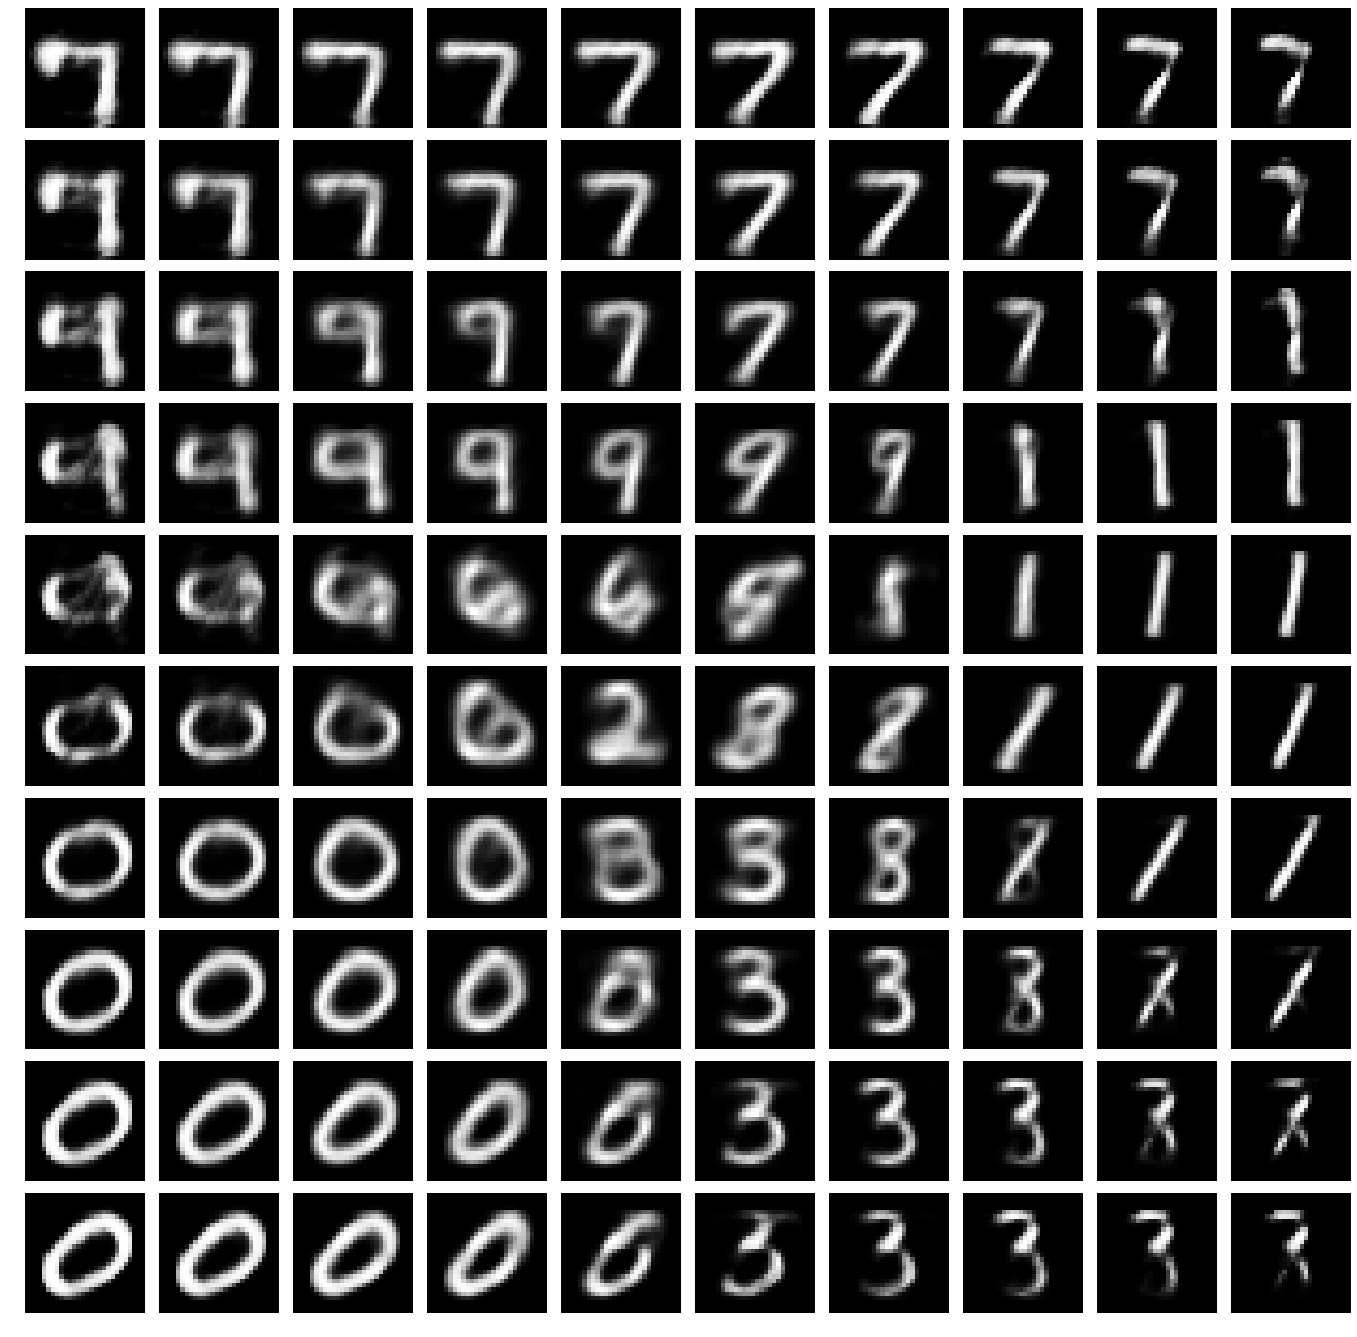

In [36]:
# we can now see how the latent space has clustered the different numbers by their features
ngdlutils.render_image_latent_space(vae.decoder,10)

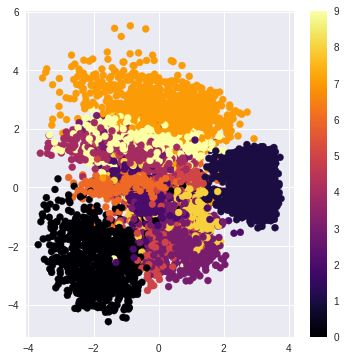

In [37]:
# this shows us how our numbers are arranged in latent space
# we can then add colour to show the different classes that they should be!
# this latent space is now interpolatable
ngdlutils.render_encodings(vae.encoder,x_input_test,y_output_test)